<a href="https://colab.research.google.com/github/harshcodeer/Dog-and-Cat-classification/blob/main/Dog_and_Cat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
 # extracting the compressed dataset
from zipfile import ZipFile
data = 'dogs-vs-cats.zip'
with ZipFile(data,'r') as zp:
    zp.extractall()
    print(" The dataset is extracted")

 The dataset is extracted


In [ ]:
 # extracting the compressed dataset
from zipfile import ZipFile
data = 'train.zip'
with ZipFile(data,'r') as zp:
    zp.extractall()
    print(" The dataset is extracted")

 The dataset is extracted


In [ ]:
import os

In [ ]:
# counting the number the files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("Number of images: ", file_count)

Number of images:  25000


In [ ]:
file_name = os.listdir('/content/train')
print(file_name)

['cat.1025.jpg', 'cat.8429.jpg', 'dog.9922.jpg', 'cat.7517.jpg', 'dog.1083.jpg', 'dog.4964.jpg', 'cat.7128.jpg', 'cat.1316.jpg', 'cat.4501.jpg', 'dog.2483.jpg', 'dog.10879.jpg', 'cat.11428.jpg', 'cat.9200.jpg', 'cat.9867.jpg', 'dog.8364.jpg', 'cat.7294.jpg', 'cat.5624.jpg', 'cat.249.jpg', 'cat.7275.jpg', 'cat.7438.jpg', 'dog.9341.jpg', 'dog.3873.jpg', 'dog.5920.jpg', 'dog.8962.jpg', 'dog.2979.jpg', 'dog.9210.jpg', 'cat.6768.jpg', 'cat.9957.jpg', 'cat.9868.jpg', 'dog.6549.jpg', 'cat.4252.jpg', 'cat.8257.jpg', 'dog.5244.jpg', 'dog.1416.jpg', 'cat.11394.jpg', 'dog.5464.jpg', 'cat.975.jpg', 'dog.4265.jpg', 'cat.12088.jpg', 'dog.7118.jpg', 'cat.1044.jpg', 'cat.4390.jpg', 'cat.7859.jpg', 'cat.5131.jpg', 'cat.2662.jpg', 'cat.6887.jpg', 'cat.9334.jpg', 'cat.9891.jpg', 'cat.9447.jpg', 'dog.2242.jpg', 'dog.1732.jpg', 'cat.9651.jpg', 'cat.96.jpg', 'dog.905.jpg', 'cat.3540.jpg', 'cat.10101.jpg', 'dog.4781.jpg', 'dog.1636.jpg', 'dog.6751.jpg', 'dog.5080.jpg', 'dog.11049.jpg', 'dog.11948.jpg', 'dog.

In [ ]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mping
from sklearn.model_selection import train_test_split
import cv2

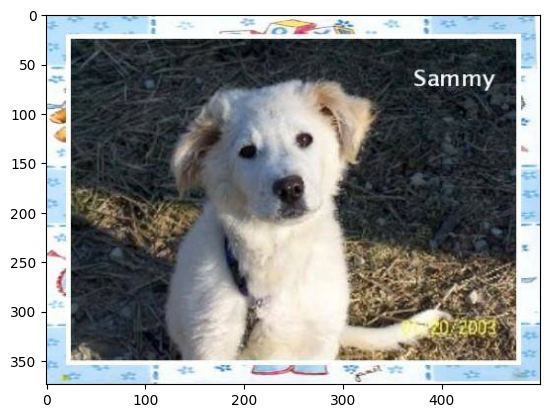

In [ ]:
# display dog image
img = mping.imread('/content/train/dog.9876.jpg')
img_plot = plt.imshow(img)

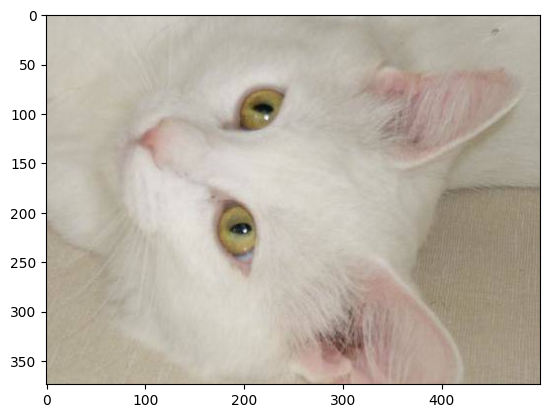

In [ ]:
# display cat image
img = mping.imread('/content/train/cat.9876.jpg')
img_plot = plt.imshow(img)

In [ ]:
file_names = os.listdir('/content/train')
for i in range(10):

    name = file_names[i]
    print(name[0:3])

cat
cat
dog
cat
dog
dog
cat
cat
cat
dog


In [ ]:
file_names = os.listdir('/content/train')

dog_count = 0
cat_count = 0

for img_file in file_names:
    name = img_file[0:3]

    if name == 'dog':
        dog_count+=1
    else:
        cat_count+=1

print("Number of dogs: ",dog_count)
print("Number of cats: ",cat_count)

Number of dogs:  12500
Number of cats:  12500


In [ ]:
os.mkdir('/content/image resized')

FileExistsError: [Errno 17] File exists: '/content/image resized'

In [ ]:
# Define paths
original_folder = '/content/train'  # Folder containing all images
resized_folder = '/content/image resized'  # Destination folder for resized images

# Ensure output directory exists
os.makedirs(resized_folder, exist_ok=True)

# Get all filenames
all_files = os.listdir(original_folder)

# Filter cat and dog images based on naming convention (assuming filenames contain "cat" or "dog")
dog_images = [f for f in all_files if "dog" in f.lower()]
cat_images = [f for f in all_files if "cat" in f.lower()]

# Select 1000 images from each category
selected_dogs = dog_images[:2000]
selected_cats = cat_images[:2000]

# Combine selected images
selected_images = selected_dogs + selected_cats

# Resize and save images
for filename in selected_images:
    img_path = os.path.join(original_folder, filename)

    # Open, resize, and convert image
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert("RGB")

    # Save to new location
    newimg_path = os.path.join(resized_folder, filename)
    img.save(newimg_path)

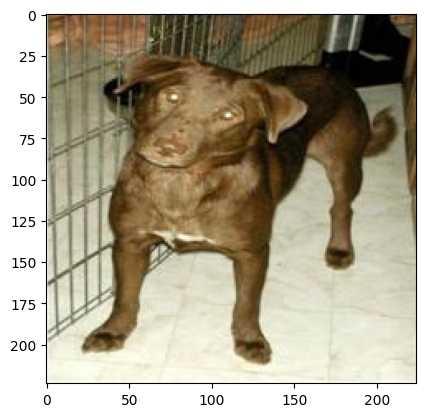

In [ ]:
# display reshaped dog image
img = mping.imread('/content/image resizeddog.1.jpg')
img_plot = plt.imshow(img)

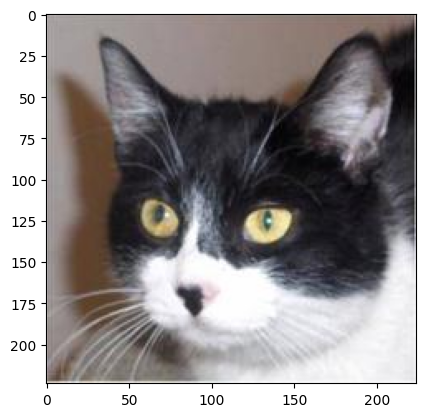

In [ ]:
# display cat image
img = mping.imread('/content/image resizedcat.9881.jpg')
img_plot = plt.imshow(img)

In [ ]:
import glob

In [ ]:
import glob
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

image_directory = '/content/image resized'
image_extension = ['png','jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = []
labels = []


for file in files:
    img = cv2.imread(file)
    if img is not None:  # Check if the image was read successfully
        dog_cat_images.append(img)
        file_name = os.path.basename(file) # Extract the filename from the full path
        label = file_name[0:3]

        if label == 'dog':
            labels.append(1)

        else:
            labels.append(0)


dog_cat_images = np.asarray(dog_cat_images)
labels = np.asarray(labels)

X = dog_cat_images
Y = labels

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
!pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0
import tensorflow as tf
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

num_of_classes = 2
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc'])


In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 37s 677ms/step - loss: 0.0381 - acc: 0.9819
Epoch 2/5
50/50 [==============================] - 34s 678ms/step - loss: 2.5771e-04 - acc: 1.0000
Epoch 3/5
50/50 [==============================] - 34s 671ms/step - loss: 2.3072e-04 - acc: 1.0000
Epoch 4/5
50/50 [==============================] - 33s 662ms/step - loss: 2.0724e-04 - acc: 1.0000
Epoch 5/5
50/50 [==============================] - 39s 777ms/step - loss: 1.8541e-04 - acc: 1.0000


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test score:', score)
print('Test accuracy:', acc)

13/13 [==============================] - 9s 628ms/step - loss: 1.4480e-04 - acc: 1.0000
Test score: 0.00014480046229436994
Test accuracy: 1.0


Predictive **System**

Path of the image to be predicted:/content/image resizedcat.10008.jpg


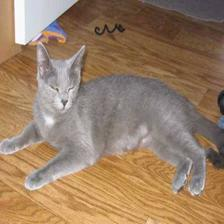

1/1 [==============================] - 0s 53ms/step
[[ 5.4237084 -4.5122814]]
0
The image is a cat


In [ ]:
input_image_path = input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

from google.colab.patches import cv2_imshow
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
    print('The image is a cat')
else:
    print('The image is a dog')